# **AP155 Lab Assignment** 
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 5 are worth 20, 20, 10, 30, and 20 points, respectively).

_Due Date_: **5PM of November 3 (Thu)**



### Student Information 

_Full Name (Last Name, First Name)_: Baldres, Jonabel Eleanor\
_Student No._: 2020-07278\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/20
* Problem 2 - XX/20
* Problem 3 - XX/10
* Problem 4 - XX/30
* Problem 5 - XX/20

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (20 pts.) 
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

2. What are the percentage errors of your answers in (1)? *(2 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(8 pts.;  4 pts. for the code & 4 pts. for the discussion text)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(2 pts.)*

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import math
from math import sin, sqrt
# hello lovely
#hello ulit lovely

In [2]:
def f(x):
  return 2*x**4 + 3*x**2 + 4*x + 5

In [3]:
def int_f(x):
  return 2*x**5/5 + x**3 + 2*x**2 + 5*x

In [4]:
print("The actual value of the integral is " + str(int_f(5)))

The actual value of the integral is 1450.0


*Trapezoidal Rule*

In [5]:
a=0
b=5

def trap(N):
  h= (b-a)/N
  s= 0.5*f(a) + 0.5*f(b)

  for k in range(1,N):
    s += f(a+k*h)

  return h*s

In [6]:
for i in [10,100,1000]:
  print(trap(i))

1471.4375
1450.2145812500003
1450.0021458331234


In [7]:
def perr(N):
  return (trap(N) - int_f(5)) / int_f(5) * 100

In [8]:
for k in [10,100,1000]:
  print(perr(k))

1.478448275862069
0.014798706896569988
0.00014798849127240326


*Simpsons Rule*

In [9]:
a=0
b=5

def simp(N):
  h= (b-a)/N
  c = h/3
  s= f(a) + f(b)

  for k in range(2,N,2): #even
    s+= 2* f(a+k*h)

  for k in range(1,N,2): #odd
    s+= 4* f(a+k*h) 

  return c*s

In [10]:
for i in [10,100,1000]:
  print(simp(i))

1450.0833333333333
1450.0000083333334
1450.0000000008336


In [11]:
def perrs(N):
  return (simp(N) - int_f(5)) / int_f(5) * 100

In [12]:
for k in [10,100,1000]:
  print(perrs(k))

0.005747126436776382
5.747126500676226e-07
5.748633752930267e-11


## PROBLEM 2 (20 pts.)

**Integration using the adaptive trapezoidal rule method and Romberg integration**

Calculate the integral $ I = \int_0^1 \sin^2 \sqrt{100x} \mbox{d}x $.

1. Do the numerical calculation using the adaptive trapezoidal rule method to an approximate accuracy of $\epsilon = 10^{-6}$. Start with one single integration slice and work up from there to two, four, eight, and so forth. Save and print out the number of slices, its estimate of the integral, and its estimate of the error on the integral, for each value of the number of slices $N$, until the target accuracy is reached. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

2. Repeat the calculation using the Romberg integration technique. Save and print out the same variables as in (1). *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

3. Compare the results from both calculations by creating a plot of error estimates vs. $N$. Annotate your chart completely (include proper axis labels and legend). Describe how the trends for the two techniques compare. *(4 pts.; 2 pts. for the chart & 2 pts. for the discussion text)*

In [13]:
a=0
b=1
data = []
def g(x):
  return (sin(10*sqrt(x)) ** 2)

def integrate(func, N):
  h = (b-a)/N

  new_part = 0
  for i in range(1,N,2):
    new_part += func(a+i*h)

  return new_part * h

def adaptive_trapezoidal(func):
  N= 2
  initial = 0
  final = (b-a)/N * (func(a) + func(b))
  error= abs(final - initial)/3

  while error > 1.e-6:
    initial = final
    final = (0.5 * initial) + integrate(func, N)
    error = abs(final - initial)/3
    N*= 2
    data.append([final, error, N/2])

  return data

data = adaptive_trapezoidal(g)
for i in range(0,len(data)):
     print("The value of integral is: ", data[i][0],",", "with error: ", data[i][1],",", "and N: ", data[i][2] )

The value of integral is:  0.3252319078064746 , with error:  0.05908414108660751 , and N:  2.0
The value of integral is:  0.5122828507233319 , with error:  0.0623503143056191 , and N:  4.0
The value of integral is:  0.4029974484782485 , with error:  0.03642846741502781 , and N:  8.0
The value of integral is:  0.43010336929474713 , with error:  0.009035306938832885 , and N:  16.0
The value of integral is:  0.44841466578747 , with error:  0.006103765497574298 , and N:  32.0
The value of integral is:  0.4539129312153758 , with error:  0.0018327551426352562 , and N:  64.0
The value of integral is:  0.45534850437280205 , with error:  0.000478524385808754 , and N:  128.0
The value of integral is:  0.455711266453241 , with error:  0.00012092069347964991 , and N:  256.0
The value of integral is:  0.455802199651664 , with error:  3.0311066141005167e-05 , and N:  512.0
The value of integral is:  0.4558249481324199 , with error:  7.582826918632139e-06 , and N:  1024.0
The value of integral is:  0

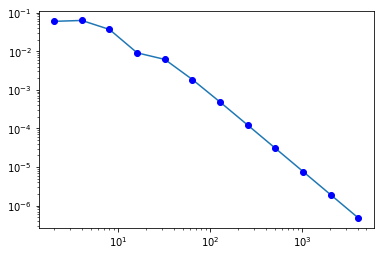

In [14]:
x= []
y= []
for i in range(0,len(data)):
     x.append(data[i][2])

for i in range(0,len(data)):
     y.append(data[i][1])

fig, ax = plt.subplots()

ax.plot(x, y)
ax.plot(x, y, 'bo')
plt.xscale("log")
plt.yscale("log")


plt.show()

In [15]:
import numpy as np

def E(t):
    return np.sin(np.sqrt(100*t))**2
N = 2
a = 0.0 
b = 1.0 
h = (b-a)/N
error = 10**(-6)
err = [np.inf]
No = []

def TrapI(f,N,a,b):

    h = (b-a)/N
    T = 0.5*f(a) + 0.5*f(b)
    
    for k in range(1,N):
        T += f(a+k*h)
    return(h*T)
    
I1 = 0
I2 = TrapI(E,N,a,b)
while np.abs(1/3*(I2-I1)) > error:
    hi = (b-a)/N
    I1 = I2
    I2 = 1/2*I1
    for k in range(1,N-1,2):
        I2 += hi*E(a+k*hi)
    N = 2*N

def Romberg(f,a,b,eps):
    size = 7
    Q = np.zeros((size,size),float)

    for i in range(0,7):
        N = 2**i
        No.append(N)
        Q[i,0] = TrapI(f,N,a,b)
        for k in range(0,i):
            n = k + 2
            Q[i,k+1] = 1.0/(4**(n-1)-1)*(4**(n-1)*Q[i,k] - Q[i-1,k])
        if (i > 0):
          if (np.inf >= error):
            err.append(abs(Q[i,k+1] - Q[i,k]))
            if (abs(Q[i,k+1] - Q[i,k]) < error):
              break 
            


    return Q, err, No

Q, err, No = Romberg(E,a,b,error)

In [16]:
Q

array([[0.14797948, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.32523191, 0.38431605, 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.51228285, 0.57463317, 0.58732097, 0.        , 0.        ,
        0.        , 0.        ],
       [0.40299745, 0.36656898, 0.35269804, 0.34897386, 0.        ,
        0.        , 0.        ],
       [0.43010337, 0.43913868, 0.44397666, 0.44542552, 0.44580376,
        0.        , 0.        ],
       [0.44841467, 0.45451843, 0.45554375, 0.45572735, 0.45576775,
        0.45577749, 0.        ],
       [0.45391293, 0.45574569, 0.4558275 , 0.45583201, 0.45583242,
        0.45583248, 0.45583249]])

In [17]:
err

[inf,
 0.05908414108660753,
 0.0126878077423912,
 0.00372417360802918,
 0.0003782418080209293,
 9.739968281519129e-06,
 1.3428278877736233e-08]

In [18]:
No

[1, 2, 4, 8, 16, 32, 64]

In [19]:
values = []
for i in range(7):
  values.append(Q[i,i])
values

[0.14797948454665205,
 0.38431604889308213,
 0.5873209727713417,
 0.34897386185747603,
 0.4458037647108326,
 0.45577749223109676,
 0.4558324944613789]

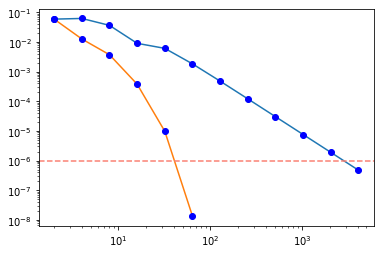

In [20]:
x= []
y= []
for i in range(0,len(data)):
     x.append(data[i][2])

for i in range(0,len(data)):
     y.append(data[i][1])

fig, ax = plt.subplots()

ax.plot(x, y)
ax.plot(x, y, 'bo')
ax.plot(No, err)
ax.plot(No, err, 'bo')
plt.xscale("log")
plt.yscale("log")
plt.axhline([10**(-6)], color = 'salmon', linestyle = '--')


plt.show()

### PROBLEM 3 (10 pts.)

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(2 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

In [21]:
## 1 ##
from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w


def gaussxwab(N,a,b):
  x,w = gaussxw(N)
  return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w
  

In [22]:
def f(x):
  return 2*x**4 + 3*x**2 + 4*x + 5


In [23]:
def gquadrature(function,a, b):

    xp, wp = gaussxwab(N,a,b)

    s = 0.0

    for k in range(N):
        s += wp[k]*function(xp[k])

    return s


In [24]:
N = 3
a = 0
b = 5

x, w = gaussxw(N)
xp = 0.5 * (b-a) * x + 0.5 * (b+a)
wp = 0.5 * (b-a) * w 

# Performing the integration
s = 0.0
for k in range(N):
  s += wp[k] * f(xp[k])

print(s)

1450.000000000002


### PROBLEM 4 (30 pts.)

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(16 pts.; 8 pts. for the code & 8 pts. for the discussion text)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(14 pts.; 7 pts. for the plot & 7 pts. for the discussion text)*

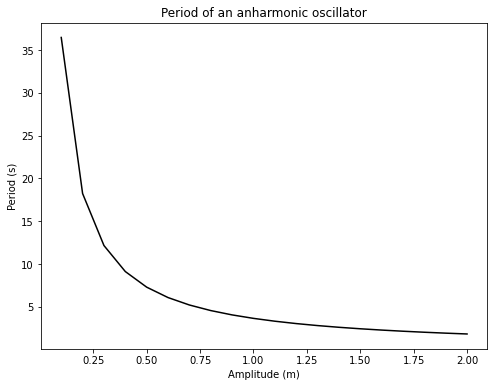

In [25]:
#4
m = 1 
N = 20
a = 0
amplitude = linspace(0.1,2,N) # start, stop, number of samples to generate

def T(x):
  return sqrt(8*m) / sqrt(amp**4 - x**4)

S = []
for amp in amplitude:
  S.append(gquadrature(T,a,amp))

plt.figure(figsize=(8,6))
plt.title("Period of an anharmonic oscillator")
plt.xlabel("Amplitude (m)")
plt.ylabel("Period (s)")
plt.plot(amplitude,S, 'black')
plt.show()



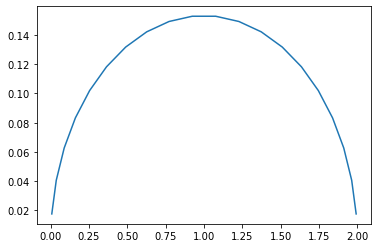

In [26]:
#Trial
x,w = gaussxwab(20, 0, amp)
s= 0.0
for k in range(N):
  s += w[k]*T(x[k])

plt.plot(x,w)
plt.show()

### PROBLEM 5 (20 pts.)

**Differentiation using central difference**

1. Calculate the derivative of the function $1 + \frac{1}{2} \tanh 2x$ in the range $-2 \le x \le 2$ using central difference. Describe each step of the calculation clearly and concisely. *(10 pts.; 5 pts. for the code & 5 pts. for the discussion text)*

2. Calculate an analytic formula for the derivative and make a graph with your numerical result and the analytic answer on the same plot. Plot the exact answer as lines and the numerical one as dots. Describe how the two results compare. *(10 pts.; 5 pts. for the code & 5 pts. for the discussion text)*

In [27]:
from math import tanh, cosh
here = []
def func(x):
  return 1 + 0.5 * tanh(2*x) 
def CentralDif(f,x,h):
  derivative = (f(x+h) - f(x-h))/ (2 * h)
  return derivative

for i in range(-2,3,1):
  here.append(CentralDif(func,i,0.000000000001))

here

[0.0013322676295501878,
 0.07061018436615996,
 1.0000333894311098,
 0.07061018436615996,
 0.0013322676295501878]

In [28]:
def deriv_fun(x):
  return ((1/ cosh(2*x)) **  2 )

In [29]:
blank = []
for i in range(-2,3,1):
  blank.append(deriv_fun(i))

blank

[0.0013409506830258967,
 0.07065082485316448,
 1.0,
 0.07065082485316448,
 0.0013409506830258967]

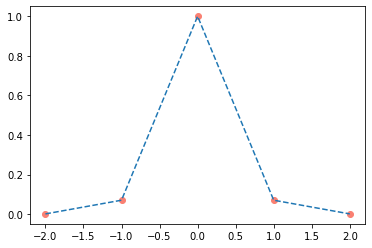

In [30]:
x = [-2,-1,0,1,2]

plt.scatter(x,here, color = 'salmon')
plt.plot(x,blank, '--')
plt.show()